In [1]:
#! pip install osmnx

In [2]:
#! pip install contextily

In [6]:
! pip install networkx

In [59]:
## Importing libraries
import osmnx as ox
import networkx as nx

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import contextily as ctx
from pyproj import CRS

/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [10]:
#fetching the OSM data from Nakagawa
place_name = "Nakagawa, Japan"

# Retrieve the network
graph = ox.graph_from_place(place_name, network_type='drive') # We can use any network type "all_private", "all", "bike", "drive"

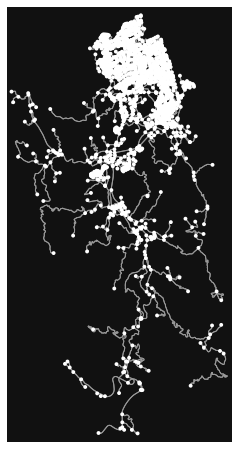

In [11]:
# plot the graph:
fig, ax = ox.plot_graph(graph)

In [12]:
# Retrieve only edges from the graph
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)

<AxesSubplot:>

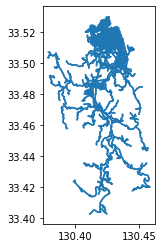

In [13]:
edges.plot()

In [14]:
# Check columns
edges.columns

Index(['osmid', 'lanes', 'highway', 'width', 'oneway', 'length', 'geometry',
       'ref', 'name', 'bridge', 'maxspeed', 'tunnel', 'access'],
      dtype='object')

In [15]:
# Check crs
edges.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
edges.head()

osmid lanes       highway  ... maxspeed  tunnel  access
u         v          key                                 ...                         
663202901 663202904  0     58072585     2      tertiary  ...      NaN     NaN     NaN
          1269988853 0    111476971   NaN  unclassified  ...      NaN     NaN     NaN
          680925948  0     58072585     2      tertiary  ...      NaN     NaN     NaN
663202904 1269988810 0     58072585     2      tertiary  ...      NaN     NaN     NaN
          663202901  0     58072585     2      tertiary  ...      NaN     NaN     NaN

[5 rows x 13 columns]

In [17]:
# Finding out the features in the highway column
edges['highway'].value_counts()

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


unclassified                   3565
residential                     826
tertiary                        470
secondary                       272
trunk                           187
primary                          66
[residential, unclassified]      36
[tertiary, unclassified]          2
[residential, tertiary]           2
[road, unclassified]              2
Name: highway, dtype: int64

In [18]:
# Reprojecting the data
graph_proj = ox.project_graph(graph) 

In [19]:
# Get Edges and Nodes
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)

In [20]:
print("Coordinate system:", edges_proj.crs)

Coordinate system: +proj=utm +zone=52 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


In [21]:
edges_proj.head()

osmid lanes       highway  ... maxspeed  tunnel  access
u         v          key                                 ...                         
663202901 663202904  0     58072585     2      tertiary  ...      NaN     NaN     NaN
          1269988853 0    111476971   NaN  unclassified  ...      NaN     NaN     NaN
          680925948  0     58072585     2      tertiary  ...      NaN     NaN     NaN
663202904 1269988810 0     58072585     2      tertiary  ...      NaN     NaN     NaN
          663202901  0     58072585     2      tertiary  ...      NaN     NaN     NaN

[5 rows x 13 columns]

In [22]:
# Checking ESPG projection
CRS(edges_proj.crs).to_epsg()

32652

**Analyzing the network by street network measures**

In [23]:
# Calculate network statistics
stats = ox.basic_stats(graph_proj, circuity_dist='euclidean')
stats

/usr/local/lib/python3.7/dist-packages/osmnx/stats.py:370: UserWarning: The `circuity_dist` argument has been deprecated and will be removed in a future release.
  warnings.warn(msg)


{'circuity_avg': 1.1681547916797839,
 'edge_length_avg': 115.2905103168759,
 'edge_length_total': 625796.8900000023,
 'intersection_count': 1669,
 'k_avg': 5.692711064499213,
 'm': 5428,
 'n': 1907,
 'self_loop_proportion': 0.0014652014652014652,
 'street_length_avg': 115.16997875457882,
 'street_length_total': 314414.0420000002,
 'street_segment_count': 2730,
 'streets_per_node_avg': 2.894598846355532,
 'streets_per_node_counts': {0: 0, 1: 238, 2: 2, 3: 1393, 4: 271, 5: 3},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.12480335605663345,
  2: 0.001048767697954903,
  3: 0.7304667016255899,
  4: 0.14210802307288936,
  5: 0.0015731515469323545}}

In [25]:
# Calculate the coverage area of the street network
area = edges_proj.unary_union.convex_hull.area
area

74135839.41242208

In [26]:
# Retrieving the missing statistics using area information

stats = ox.basic_stats(graph_proj, area = area)
stats

{'circuity_avg': 1.1681547916797839,
 'edge_density_km': 8441.219455527536,
 'edge_length_avg': 115.2905103168759,
 'edge_length_total': 625796.8900000023,
 'intersection_count': 1669,
 'intersection_density_km': 22.512728165324386,
 'k_avg': 5.692711064499213,
 'm': 5428,
 'n': 1907,
 'node_density_km': 25.72305129495123,
 'self_loop_proportion': 0.0014652014652014652,
 'street_density_km': 4241.053240807003,
 'street_length_avg': 115.16997875457882,
 'street_length_total': 314414.0420000002,
 'street_segment_count': 2730,
 'streets_per_node_avg': 2.894598846355532,
 'streets_per_node_counts': {0: 0, 1: 238, 2: 2, 3: 1393, 4: 271, 5: 3},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.12480335605663345,
  2: 0.001048767697954903,
  3: 0.7304667016255899,
  4: 0.14210802307288936,
  5: 0.0015731515469323545}}

In [27]:
from osmnx.stats import extended_stats
# Extracting additional statistics
extended_stats = ox.extended_stats(graph_proj, ecc=False, bc=True, cc=True)
extended_stats

/usr/local/lib/python3.7/dist-packages/osmnx/stats.py:458: UserWarning: The extended_stats function has been deprecated and will be removed in a future release. Use NetworkX directly for extended topological measures.
  warnings.warn(msg)


{'avg_neighbor_degree': {663202901: 3.0,
  663202904: 3.0,
  1269988853: 3.3333333333333335,
  680925948: 2.6666666666666665,
  1269988810: 3.0,
  1269988820: 3.0,
  663202906: 3.0,
  663202907: 3.3333333333333335,
  1269988818: 3.0,
  663202908: 3.25,
  1269988838: 3.0,
  663202910: 3.25,
  1269988836: 3.6666666666666665,
  663202912: 3.3333333333333335,
  722379398: 3.25,
  692566381: 3.5,
  663202913: 3.0,
  1269988843: 3.3333333333333335,
  663202915: 3.3333333333333335,
  1269988832: 3.0,
  663202916: 3.25,
  1269988841: 3.3333333333333335,
  692568344: 3.3333333333333335,
  1269988844: 3.5,
  1269988823: 3.6666666666666665,
  663202919: 3.25,
  663202920: 3.25,
  1852500332: 2.3333333333333335,
  1269988837: 3.3333333333333335,
  765590120: 3.25,
  1269988851: 3.6666666666666665,
  1269988826: 3.5,
  680924476: 3.5,
  1676633444: 3.6666666666666665,
  1676590665: 4.0,
  1676678256: 3.25,
  1658904855: 3.5,
  680924487: 3.0,
  1676634033: 3.0,
  1658908339: 3.0,
  1676633884: 2.33

In [74]:
# Get the Convex Hull of the network
convex_hull = edges_proj.unary_union.convex_hull

# Show output
#convex_hull

In [29]:
# Calculate the area
area = convex_hull.area

# Calculate statistics with density information
stats = ox.basic_stats(graph_proj, area=area)
extended_stats = ox.extended_stats(graph_proj, ecc=True, cc=True)

# Add extened statistics to the basic statistics
for key, value in extended_stats.items():
    stats[key] = value
    
# Convert the dictionary to a Pandas series for a nicer output
pd.Series(stats)

/usr/local/lib/python3.7/dist-packages/osmnx/stats.py:458: UserWarning: The extended_stats function has been deprecated and will be removed in a future release. Use NetworkX directly for extended topological measures.
  warnings.warn(msg)


n                                                                                   1907
m                                                                                   5428
k_avg                                                                           5.692711
edge_length_total                                                              625796.89
edge_length_avg                                                                115.29051
streets_per_node_avg                                                            2.894599
streets_per_node_counts                      {0: 0, 1: 238, 2: 2, 3: 1393, 4: 271, 5: 3}
streets_per_node_proportions           {0: 0.0, 1: 0.12480335605663345, 2: 0.00104876...
intersection_count                                                                  1669
street_length_total                                                           314414.042
street_segment_count                                                                2730
street_length_avg    

**Finding the shortest path**

In [30]:
# Network analysis
# Calculate the centriod of the street network 
centroid = edges.unary_union.convex_hull.centroid
centroid.x, centroid.y

(130.4208325266064, 33.46607168007023)

In [32]:
# Calculate the nodes of street network 
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)
nodes.head()

,y,x,street_count,lon,lat,highway,geometry
osmid,,,,,,,
663202901,3.710076e+06,633168.226054,4,130.433987,33.521978,NaN,POINT (633168.226 3710076.353)
663202904,3.709976e+06,633186.222324,3,130.434166,33.521071,NaN,POINT (633186.222 3709976.011)
1269988853,3.710056e+06,633119.919935,3,130.433464,33.521804,NaN,POINT (633119.920 3710056.388)
680925948,3.710135e+06,633159.323155,4,130.433900,33.522509,traffic_signals,POINT (633159.323 3710135.098)
1269988810,3.709936e+06,633193.272456,3,130.434236,33.520707,NaN,POINT (633193.272 3709935.729)


In [33]:
edges_proj.head()

osmid lanes       highway  ... maxspeed  tunnel  access
u         v          key                                 ...                         
663202901 663202904  0     58072585     2      tertiary  ...      NaN     NaN     NaN
          1269988853 0    111476971   NaN  unclassified  ...      NaN     NaN     NaN
          680925948  0     58072585     2      tertiary  ...      NaN     NaN     NaN
663202904 1269988810 0     58072585     2      tertiary  ...      NaN     NaN     NaN
          663202901  0     58072585     2      tertiary  ...      NaN     NaN     NaN

[5 rows x 13 columns]

In [34]:
# finding the eastern most x-coordinate  
max_value = nodes['x'].max()
max_value

635428.8353692709

In [35]:
# extracting max value row from the dataframe
target_loc = nodes.loc[nodes['x']==max_value, :]
target_loc

,y,x,street_count,lon,lat,highway,geometry
osmid,,,,,,,
1852389406,3.699566e+06,635428.835369,3,130.456736,33.426923,NaN,POINT (635428.835 3699565.815)


In [37]:
# Extracting geometry
destination = target_loc.geometry.centroid.values[0]
print(destination)

POINT (635428.8353692709 3699565.814687318)


In [39]:
# Get origin x and y coordinates
orig_xy = (centroid.y, centroid.x)

# Get target x and y coordinates
target_xy = (destination.y, destination.x)

In [40]:
# Find the node in the graph that is closest to the origin point (here, we want to get the node id)
orig_node_id = ox.get_nearest_node(graph_proj, orig_xy, method='euclidean')
orig_node_id

/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


5456409939

In [41]:
# Find the node in the graph that is closest to the target point (here, we want to get the node id)
target_node_id = ox.get_nearest_node(graph_proj, target_xy, method='euclidean')
target_node_id

/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


1852389406

In [42]:
# Retrieve the rows from the nodes GeoDataFrame based on the node id (node id is the index label)
orig_node = nodes_proj.loc[orig_node_id]
target_node = nodes_proj.loc[target_node_id]

In [43]:
# Create a GeoDataFrame from the origin and target points
od_nodes = gpd.GeoDataFrame([orig_node, target_node], geometry='geometry', crs=nodes_proj.crs)
od_nodes.head()

,y,x,street_count,lon,lat,highway,geometry
5456409939,3.696815e+06,631203.904191,3,130.410902,33.402642,NaN,POINT (631203.904 3696814.792)
1852389406,3.699566e+06,635428.835369,3,130.456736,33.426923,NaN,POINT (635428.835 3699565.815)


In [44]:
# Calculate the shortest path
route = nx.shortest_path(G=graph_proj, source=orig_node_id, target=target_node_id, weight='length')

print(route)

[5456409939, 2293364252, 5456410048, 5456410128, 2459951142, 2293364301, 2293364303, 1852388908, 1852389269, 1852389366, 1852389637, 7786414746, 765631882, 1852390736, 1852390726, 765631991, 765632011, 1852389926, 1852389549, 1852389446, 1852389406]


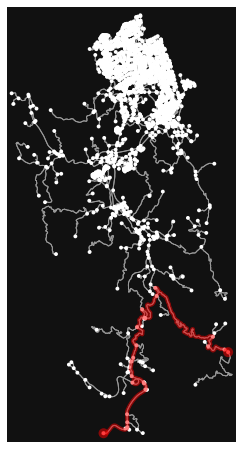

In [45]:
# Plot the shortest path
fig, ax = ox.plot_graph_route(graph_proj, route)

**Saving shortest path**

In [46]:
# Get the nodes along the shortest path
route_nodes = nodes_proj.loc[route]
route_nodes

,y,x,street_count,lon,lat,highway,geometry
osmid,,,,,,,
5456409939,3.696815e+06,631203.904191,3,130.410902,33.402642,NaN,POINT (631203.904 3696814.792)
2293364252,3.697020e+06,632012.483008,3,130.419624,33.404397,NaN,POINT (632012.483 3697020.432)
5456410048,3.697187e+06,632008.558523,3,130.419607,33.405897,NaN,POINT (632008.559 3697186.720)
5456410128,3.697459e+06,632000.866482,3,130.419564,33.408357,NaN,POINT (632000.866 3697459.388)
2459951142,3.698298e+06,632623.497057,3,130.426382,33.415841,NaN,POINT (632623.497 3698297.883)
2293364301,3.698507e+06,632574.749247,3,130.425888,33.417734,NaN,POINT (632574.749 3698507.163)
2293364303,3.698529e+06,632184.394621,3,130.421694,33.417983,NaN,POINT (632184.395 3698529.445)
1852388908,3.698751e+06,632159.532597,3,130.421460,33.419988,NaN,POINT (632159.533 3698751.486)
1852389269,3.699246e+06,632155.178781,3,130.421485,33.424444,NaN,POINT (632155.179 3699245.572)


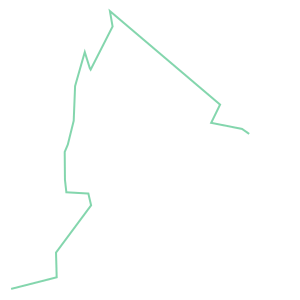

In [47]:
from shapely.geometry import LineString, Point

# Create a geometry for the shortest path
route_line = LineString(list(route_nodes.geometry.values))
route_line

In [50]:
# Create a GeoDataFrame
route_geom = gpd.GeoDataFrame([[route_line]], geometry='geometry', crs=edges_proj.crs, columns=['geometry'])



In [53]:
# Add a list of osmids associated with the route
#route_geom.loc[0, 'osmids'] = str(list(route_nodes['osmid'].values))



In [54]:
# Calculate the route length
route_geom['length_m'] = route_geom.length

route_geom.head()

,geometry,length_m
0,"LINESTRING (631203.904 3696814.792, 632012.483...",10561.83185


In [55]:
#Get buildings
tags = {'building': True}
buildings = ox.geometries_from_place(place_name, tags)

/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


In [56]:
# Reproject buildings
buildings_proj = buildings.to_crs(CRS(edges_proj.crs))

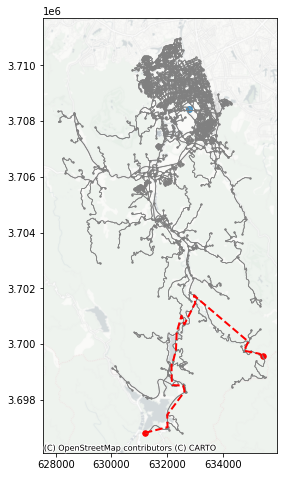

In [60]:
# Plot route and street network
fig, ax = plt.subplots(figsize=(12,8))

# Plot edges and nodes
edges_proj.plot(ax=ax, linewidth=0.75, color='gray')
nodes_proj.plot(ax=ax, markersize=2, color='gray')

# Add buildings
ax = buildings_proj.plot(ax=ax, facecolor='lightgray', alpha=0.7)

# Add the route
ax = route_geom.plot(ax=ax, linewidth=2, linestyle='--', color='red')

# Add the origin and destination nodes of the route
ax = od_nodes.plot(ax=ax, markersize=30, color='red')

# Add basemap
ctx.add_basemap(ax, crs=buildings_proj.crs, source=ctx.providers.CartoDB.Positron)

**Preparing data to save to the file**

In [61]:
edges_proj.head()

osmid lanes       highway  ... maxspeed  tunnel  access
u         v          key                                 ...                         
663202901 663202904  0     58072585     2      tertiary  ...      NaN     NaN     NaN
          1269988853 0    111476971   NaN  unclassified  ...      NaN     NaN     NaN
          680925948  0     58072585     2      tertiary  ...      NaN     NaN     NaN
663202904 1269988810 0     58072585     2      tertiary  ...      NaN     NaN     NaN
          663202901  0     58072585     2      tertiary  ...      NaN     NaN     NaN

[5 rows x 13 columns]

In [62]:
# Check if columns contain any list values
(edges_proj.applymap(type) == list).any()

osmid        True
lanes       False
highway      True
width       False
oneway      False
length      False
geometry    False
ref         False
name         True
bridge      False
maxspeed    False
tunnel      False
access      False
dtype: bool

In [64]:
# Columns with invalid values
invalid_cols = ['lanes', 'maxspeed', 'name', 'oneway', 'osmid', "highway"]

#  convert selected columns to string format
edges_proj[invalid_cols] = edges_proj[invalid_cols].astype(str)

In [65]:
# Check again if columns contain any list values
(edges_proj.applymap(type) == list).any()

osmid       False
lanes       False
highway     False
width       False
oneway      False
length      False
geometry    False
ref         False
name        False
bridge      False
maxspeed    False
tunnel      False
access      False
dtype: bool

**Saving the data**

In [68]:
import os

# Parse the place name for the output file names (replace spaces with underscores and remove commas)
place_name_out = place_name.replace(' ', '_').replace(',','')

# Output directory
out_dir = "data"

# Create output fp for a geopackage
out_fp = os.path.join(out_dir, f"OSM_{place_name_out}.gpkg")


In [73]:
# Save files
#edges_proj.to_file(out_fp, layer="streets", driver="GPKG")
#route_geom.to_file(out_fp, layer="route", driver="GPKG")
#nodes_proj.to_file(out_fp, layer="nodes", driver="GPKG")
#od_nodes.to_file(out_fp, layer="route_OD", driver="GPKG")
#buildings[['geometry', 'name', 'addr:street']].to_file(out_fp, layer="buildings", driver="GPKG")